## 5-6. Regularized Linear Models – Ridge, Lasso
### Regularized Linear Model - Ridge Regression

In [3]:
# pip install sklearn --upgrade


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [18 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  
  If the previous advice does not cover your use case, feel 

In [38]:
# 앞의 LinearRegression예제에서 분할한 feature 데이터 셋인 X_data과 Target 데이터 셋인 Y_target 데이터셋을 그대로 이용 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [39]:
import pandas as pd

bostonDF = pd.read_csv("./boston.csv", sep=',')
# bostonDF

y_target = bostonDF['MEDV']
# print('y_target : \n',y_target)
X_data = bostonDF.drop(['MEDV'],axis=1,inplace=False)
# print('X_data : \n',X_data)

In [40]:
ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [ -5.963 -13.81  -20.109 -48.466 -16.97 ]
 5 folds 의 개별 RMSE scores :  [2.442 3.716 4.484 6.962 4.119]
 5 folds 의 평균 RMSE : 4.345 


**alpha값을 0 , 0.1 , 1 , 10 , 100 으로 변경하면서 RMSE 측정**

In [41]:
# Ridge에 사용될 alpha 파라미터의 값들을 정의
alphas = [0 , 0.1 , 1 , 10 , 100]

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함.
for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    
    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha,avg_rmse))

alpha 0 일 때 5 folds 의 평균 RMSE : 4.421 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 4.392 
alpha 1 일 때 5 folds 의 평균 RMSE : 4.316 
alpha 10 일 때 5 folds 의 평균 RMSE : 4.345 
alpha 100 일 때 5 folds 의 평균 RMSE : 4.832 


**각 alpha에 따른 회귀 계수 값을 시각화. 각 alpha값 별로 plt.subplots로 맷플롯립 축 생성**

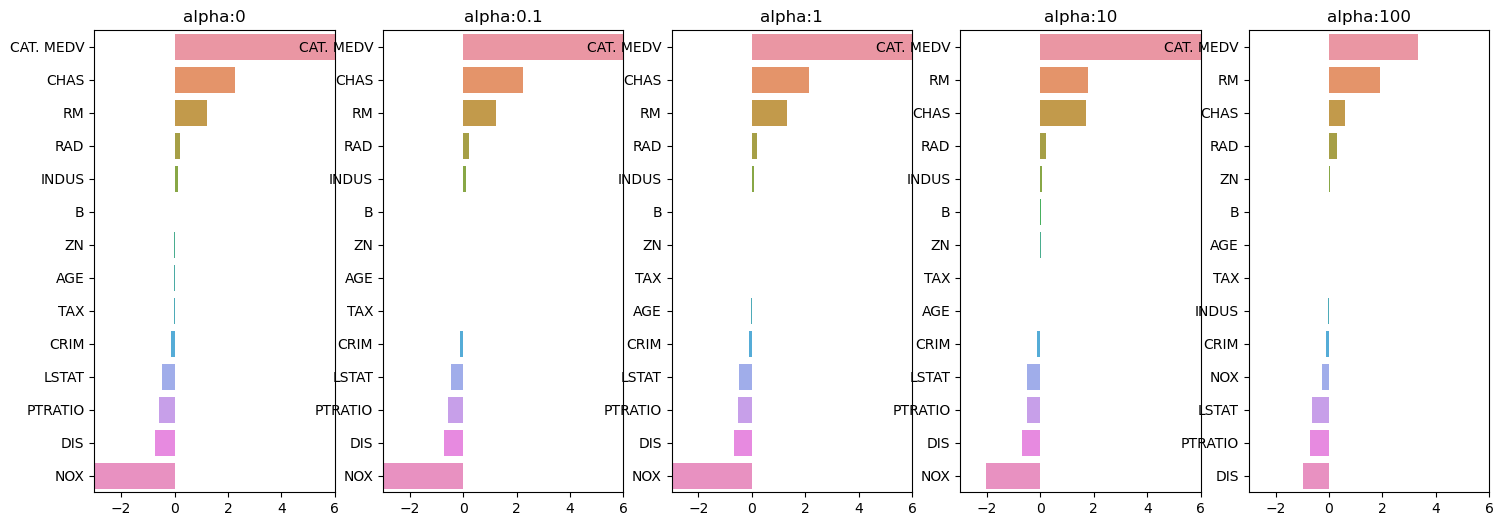

In [42]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성  
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data , y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=ridge.coef_ , index=X_data.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

**alpha 값에 따른 컬럼별 회귀계수 출력**

In [43]:
ridge_alphas = [0 , 0.1 , 1 , 10 , 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
CAT. MEDV,11.692178,11.669082,11.429285,9.205450,3.337154
CHAS,2.245550,2.232435,2.142274,1.694427,0.603716
RM,1.203226,1.216730,1.312558,1.771785,1.899950
RAD,0.219067,0.217117,0.207525,0.212277,0.284431
INDUS,0.118768,0.114834,0.092426,0.044412,-0.019271
B,0.007245,0.007297,0.007600,0.008380,0.008957
ZN,-0.004998,-0.004778,-0.003052,0.008236,0.038625
AGE,-0.008332,-0.009117,-0.013287,-0.017021,-0.003353
TAX,-0.009133,-0.009209,-0.009672,-0.011161,-0.014573
CRIM,-0.119184,-0.118718,-0.116097,-0.111087,-0.105653


### 라쏘 회귀

In [44]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, 
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        
        model.fit(X_data_n , y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff
    
    return coeff_df
# end of get_linear_regre_eval

In [45]:
# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 4.370 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 4.380 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 4.699 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.589 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.189 


In [46]:
print(lasso_alphas)

[0.07, 0.1, 0.5, 1, 3]


In [47]:
# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
CAT. MEDV,11.173666,10.885943,6.784805,1.759151,0.000000
RM,1.255642,1.232875,0.915217,0.538166,0.000000
CHAS,1.053520,0.593127,0.000000,0.000000,0.000000
RAD,0.192483,0.196566,0.214002,0.247441,0.061864
INDUS,0.053735,0.051441,0.000000,-0.000000,-0.000000
B,0.008087,0.008132,0.008006,0.007865,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
ZN,-0.000179,0.000525,0.017823,0.040903,0.037231
TAX,-0.010715,-0.010901,-0.011624,-0.014183,-0.008602
AGE,-0.017321,-0.015497,0.000866,0.020225,0.042495


### 엘라스틱넷 회귀

In [48]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df =get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                      X_data_n=X_data, y_target_n=y_target)

#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 4.382 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 4.431 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 4.986 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.409 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.068 


In [49]:
# 반환된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
CAT. MEDV,8.725996,7.806012,2.828224,1.070744,0.000000
RM,1.744716,1.822812,1.505935,0.819641,0.000000
CHAS,1.100234,0.796856,0.000000,0.000000,0.000000
RAD,0.213084,0.222500,0.273986,0.275836,0.146846
INDUS,0.030961,0.022063,-0.000000,-0.000000,-0.000000
ZN,0.010646,0.014979,0.039361,0.046595,0.038268
B,0.008531,0.008656,0.008702,0.008174,0.007020
NOX,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
TAX,-0.011589,-0.012007,-0.014833,-0.015455,-0.011417
AGE,-0.015902,-0.013642,0.004375,0.018845,0.043446


### 선형 회귀 모델을 위한 데이터 변환

In [50]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method는 표준 정규 분포 변환(Standard), 최대값/최소값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다향식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음. 
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, 
                                         include_bias=False).fit_transform(scaled_data)
    
    return scaled_data

In [51]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환방법에 따른 RMSE 추출. 
alphas = [0.1, 1, 10, 100]
#변환 방법은 모두 6개, 원본 그대로, 표준정규분포, 표준정규분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환 
scale_methods=[(None, None), ('Standard', None), ('Standard', 2), 
               ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], 
                                    input_data=X_data)
    print(X_data_scaled.shape, X_data.shape)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, 
                        y_target_n=y_target, verbose=False, return_coeff=False)

(506, 14) (506, 14)

## 변환 유형:None, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 4.392 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 4.316 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 4.345 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 4.832 
(506, 14) (506, 14)

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 4.419 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 4.408 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 4.319 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 4.221 
(506, 119) (506, 14)

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 9.629 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 6.808 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 4.514 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 4.138 
(506, 14) (506, 14)

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 4.376 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 4.172 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 4.277 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 6.368 
(506, 119) (506, 14)

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 4.517 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 3.837 
alpha 10일 때 5 폴드 세트의 평균 RMS